# Capstone Project - The Battle of Neighborhoods

## Exploring the Airbnb option in Barcelona Districts

**1. Introduction WEEK 1**

**a. Background**

The next report will try to check the option of Airbnb rooms or houses to be rented. We will compare the different prices for each neighborhood in the center area of Barcelona. We will compare how the prices varies with the number of rooms or the neighborhood.

Ranked in the Top 10 of most visited cities worldwide, Barcelona is one of the most popular tourist destinations.In 2018, Barcelona received over 15,8 million visitors, especially in the summer and Christmas time, tourist areas in Barcelona provide huge opportunities for each type of client. The core of Barcelona is made of 10 districts, but we will focus in the center of Barcelona, where the busiest venues of Barcelona can be found to target the tourists visiting the city. With that in mind, 


**b. Bussiness problem**

This report focusses on the comparaisson of different Airbnb options in a city like Barcelona, depending on what are you looking fore, one area will be more suitable than others.

**2. DATA PREPARATION**

The data will be obtained from the DataHippo project (https://datahippo.org/es/), which is a collaborative project that tries to check different tourism platforms. Using different web-scrapping techniques. We will focus into the Barcelona data and selecting the Airbnb database which has around 40000 lines of information.

1. Data preparation

we will download a csv file with those 40000 lines, but before working directly with it, we need to analyze which type of data we have, converting into a pandas dataframe an analyzing the information.
As described above, adtahippo uses a crap-web technique, which mean that some of the information can be incomplete. The first step is to eliminate all those columns that we do not need . Later we will remove all the lines with NaN information.

2. Data improvement

The data obtained contains the latitude and longitude, but we do not know the name of the street or the postal code, which is an interesting parameter to compare the different kind of prices depending on the zone. For that we will use geopy to obtain the desired information.
Unfortunately the database of geopy is not standardized, so we will need to catch all the exceptions and look for alternative parameters.

3. Data improvement

With a dataframe ready to be used, we will draw a map of Barcelona and draw a point for each flat or house available in barcelona. Plotting the postal code and it's price.

**3. STATISTICS ANALYSIS**


We will use different python data visualization tools, to visualize and compare the prices depending on the parameters, like postal code, rooms available. Or the number of aribnb available in Barcelona.
We will compare how the prices increases depending on the conditions of the flat/ house

Finally, we will use foursquere to check the neighborhood for each available option in the Airbnb, trying to decide which is the best selection for our trip planning

**Import libraries**

We will install and import all the libraries that we will need in this report

In [ ]:
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes
!pip install geopandas
!pip install geopy
import os # Operating System
import numpy as np
import pandas as pd
import datetime as dt # Datetime
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import folium #import folium # map rendering library
import datetime as DT
import hmac
from geopy.geocoders import Nominatim
from geopy.distance import vincenty
# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Libraries imported.')

**Data download from datahippo (csv file)**

In [75]:
#Read the data for examination (Source: https://datahippo.org/es/region/599230b08a46554edf884665/)
BCN_df = pd.read_csv("https://datahippo.org/media/regions/01a33629-2180-41e6-9e14-bb0ff266b2c9/599230b08a46554edf884665_airbnb.csv")

In [76]:
BCN_df.head() #let's look how is our data frame

,id,url,longitude,latitude,found,revised,host-id,room_type,bedrooms,capacity,reviews,min_nights,price
0,airbnb599230b08a46554edf8846651,https://www.airbnb.es/rooms/24640736,1.938842,41.264500,2018-08-25 15:34:45.776000,2018-09-03 22:37:21.773000,airbnb11175625,entire_home,3.0,5,0,32,NaN
1,airbnb599230b08a46554edf8846652,https://www.airbnb.es/rooms/11863455,1.939000,41.264000,2017-08-15 04:47:07.766000,2018-09-03 22:35:12.200000,airbnb1721099,entire_home,3.0,6,47,3,NaN
2,airbnb599230b08a46554edf8846653,https://www.airbnb.es/rooms/20826174,1.939133,41.263529,2018-04-05 22:28:44.396000,2018-04-10 06:43:44.888000,airbnb7948628,entire_home,2.0,4,3,4,87.0
3,airbnb599230b08a46554edf8846654,https://www.airbnb.es/rooms/20065959,1.934335,41.263590,2017-08-15 04:47:23.920000,2018-09-03 22:42:01.766000,airbnb138976033,entire_home,0.0,6,2,6,NaN
4,airbnb599230b08a46554edf8846655,https://www.airbnb.es/rooms/26706290,1.934307,41.263217,2018-08-25 15:34:47.770000,2018-09-03 22:38:52.137000,airbnb9535469,entire_home,3.0,5,1,2,NaN


In [77]:
BCN_df.shape #check the number of rows and columns. Is nearly 40K!

(39144, 13)

**Reduce our dataframe dropping all the columns that we will not need and those that have a NaN (null value)**

In [6]:
#let's eliminate the columns id, found, revised, host-id. 

In [78]:
BCN_df = BCN_df.drop(columns=['id'])
BCN_df = BCN_df.drop(columns=['found'])
BCN_df = BCN_df.drop(columns=['revised'])
BCN_df = BCN_df.drop(columns=['host-id'])

In [71]:
BCN_df.head()

,url,longitude,latitude,room_type,bedrooms,capacity,reviews,min_nights,price
0,https://www.airbnb.es/rooms/24640736,1.938842,41.264500,entire_home,3.0,5,0,32,NaN
1,https://www.airbnb.es/rooms/11863455,1.939000,41.264000,entire_home,3.0,6,47,3,NaN
2,https://www.airbnb.es/rooms/20826174,1.939133,41.263529,entire_home,2.0,4,3,4,87.0
3,https://www.airbnb.es/rooms/20065959,1.934335,41.263590,entire_home,0.0,6,2,6,NaN
4,https://www.airbnb.es/rooms/26706290,1.934307,41.263217,entire_home,3.0,5,1,2,NaN


In [79]:
#drop all rows with NaN
BCN_df = BCN_df.dropna()
BCN_df = BCN_df.reset_index(drop=True)
BCN_df.shape

(21378, 9)

In [80]:
BCN_df.dtypes

url            object
longitude     float64
latitude      float64
room_type      object
bedrooms      float64
capacity        int64
reviews         int64
min_nights      int64
price         float64
dtype: object

**Filter our data frame with Barcelona coordinates**

In [6]:
# The data frame is to big, includes not only Barcelona city, also includes it's surrounding cities
#For that we will range the coordinates of our dataframe to be sure that we are focussing in Barcelona City
#The coordinates of Barcelona are Latitute = 41.263529 and Longitude 1.939133"
lat_max = 41.40 #define lat max (lat= latitude)
lat_min = 41.36 #define lat min 
lon_max= 2.18 #define lon max (lon = longitude)
lon_min = 2.14 #define lon min
BCN_df = BCN_df[BCN_df['latitude'].between(lat_min, lat_max)] #filter the latitude parameters that we desire
BCN_df = BCN_df[BCN_df['longitude'].between(lon_min, lon_max)] #filter the longitude parameters that we desire
BCN_df = BCN_df[BCN_df['reviews'].between(100, 200)] #additionally, let's focus of those advertisements that have between 100 and 200 reviews.
geolocator = Nominatim()
geolocator = Nominatim(user_agent="bcn_explorer")
BCN_df=BCN_df.reset_index(drop=True)

BCN_df.shape

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  # This is added back by InteractiveShellApp.init_path()


(419, 13)

**Using geopy library, let's obtain the street name and postal code with our latitude and longitude**

In [7]:
#it's time to use the geopy option, we will explore our new dataframe of 419 lines, and pass to geopy library the latitude and longitude for each advertisements.
#the geopy will return a list of all the information for those coordinates, like city, neigborhood, suburb, postal code, country, community etc...
#we would like to obtain the postal code and as explained in the description, we will need to scrap the information, because is not standardized
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="BCN")

adress = []
neighbourhood = []
city_district = []
post_code= []

for lat,lon in zip (BCN_df['latitude'],BCN_df['longitude']):
    try:
        Latitude = str(lat)
        Longitude = str(lon)
        coordinate= Latitude + "," + Longitude
        location = geolocator.reverse(coordinate, timeout=1)
        data = location.raw
        #print (location.raw)
        data_slice =  data['address']
        data_final= str(data_slice['road'])
        pc = str(data_slice['postcode'])
        adress.append(data_final)
        post_code.append(pc)
        #BCN_df['Address'] = data_final 
        #adress.append((data_final))
    except Exception as a:
        try:
            #print (location.raw)
            data = data['address']
            data_final= str(data['amenity'])
            pc = str(data_slice['postcode'])
            adress.append(data_final)
            post_code.append(pc)
            #adress.append((data_final))
            #BCN_df['Address'] = data_final 
        except Exception as e:
            try:
                #print (location.raw)
                data = data['address']
                data_final= str(data['neighbourhood'])
                pc = str(data_slice['postcode'])
                adress.append(data_final)
                post_code.append(pc)
                adress.append(data_final)
                #adress.append((data_final))
                #BCN_df['Address'] = data_final 
                
            except Exception as i:
                try:
                    #print (location.raw)
                    data = data['neighbourhood']
                    data_final= str(data['suburb'])
                   
                    adress.append(data_final)
                    post_code.append(pc)
                    #adress.append((data_final))
                   # BCN_df['Address'] = data_final 
                except Exception as o:
                    try:
                        #print (location.raw)
                        data = data['suburb']
                        data_final= str(data['city'])
                        pc = str(data_slice['postcode'])
                        post_code.append(pc)
                        adress.append(data_final)
                        #adress.append((data_final))
                        #BCN_df['Address'] = data_final 
                    except Exception as u:
                        #BCN_df['Address'] = data
                        #print(location.raw)
                        adress.append((data))
                        pc = str(data_slice['suburb'])
                        post_code.append(pc)
                        
bcn_adress= pd.DataFrame({'adress':adress})   

In [8]:
#Let's instroduces the name of the street and it's postal code
BCN_df['Address'] = pd.Series(adress).values
BCN_df['postal_code'] = pd.Series(post_code).values

In [9]:
BCN_df

,id,url,longitude,latitude,found,revised,host-id,room_type,bedrooms,capacity,reviews,min_nights,price,Address,postal_code
0,airbnb599230b08a46554edf8846655802,https://www.airbnb.es/rooms/1171828,2.144658,41.384836,2017-08-15 17:26:04.466000,2017-09-09 03:18:04.900000,airbnb6415812,entire_home,4.0,6,107,3,170.0,Carrer de Còrsega,08029
1,airbnb599230b08a46554edf8846655855,https://www.airbnb.es/rooms/3279621,2.142211,41.380844,2017-09-05 12:15:14.420000,2018-06-01 09:13:19.896000,airbnb15920367,private_room,1.0,4,126,2,24.0,Avinguda de Josep Tarradellas,08001
2,airbnb599230b08a46554edf8846655952,https://www.airbnb.es/rooms/16300086,2.143545,41.375426,2017-08-15 17:21:44.195000,2018-05-12 15:29:24.803000,airbnb101127465,entire_home,2.0,4,179,2,80.0,Carrer del Consell de Cent,8015
3,airbnb599230b08a46554edf8846655963,https://www.airbnb.es/rooms/399111,2.142733,41.375011,2017-09-05 12:13:38.272000,2017-09-09 03:28:13.594000,airbnb1993323,entire_home,1.0,3,155,4,59.0,Carrer del Consell de Cent,08011
4,airbnb599230b08a46554edf8846655979,https://www.airbnb.es/rooms/3920808,2.143814,41.374173,2017-08-15 15:08:54.505000,2017-09-09 03:28:54.036000,airbnb3242234,private_room,1.0,2,104,5,40.0,Carrer d'Hostafrancs de Sió,08001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,airbnb599230b08a46554edf88466528815,https://www.airbnb.es/rooms/13550457,2.179924,41.385129,2017-08-15 19:37:44.387000,2018-05-12 19:43:34.577000,airbnb78018864,entire_home,1.0,2,101,6,103.0,Carrer de la Princesa,08001
415,airbnb599230b08a46554edf88466528817,https://www.airbnb.es/rooms/3400111,2.179897,41.384970,2017-08-15 19:37:48.429000,2018-05-13 03:54:44.072000,airbnb16875725,private_room,1.0,2,116,4,43.0,Carrer de la Princesa,08001
416,airbnb599230b08a46554edf88466528821,https://www.airbnb.es/rooms/3098724,2.179807,41.384965,2017-08-15 19:37:40.534000,2017-09-10 01:03:29.070000,airbnb4268101,entire_home,0.0,4,164,4,80.0,Carrer de les Candeles,08001
417,airbnb599230b08a46554edf88466528829,https://www.airbnb.es/rooms/2416137,2.179730,41.384434,2017-08-15 19:36:59.972000,2017-09-10 01:04:06.087000,airbnb4381056,private_room,1.0,2,146,2,32.0,Via Laietana,08002


Again, let's filter all those rows that does not look like the rest of the dataframe. Some PostalCode returned a name instead of a number.

In [12]:
BCN_df['postal_code'].unique()

array(['08029', '08001', '8015', '08011', '08002', '80002', '08004',
       '08015', 'el Raval', '08013', '08036', '08936', '080007', '080009',
       '8007', '08008', '08012', '08009', '08006', '08010', '08003',
       '08037', '08018', '08007', 'el Gòtic', '08033',
       "la Dreta de l'Eixample", 'Eixample'], dtype=object)

In [15]:
BCN_df_Backup = BCN_df
BCN_df = BCN_df[~BCN_df.postal_code.str.contains('el Gòtic')]
BCN_df = BCN_df[~BCN_df.postal_code.str.contains("la Dreta de l'Eixample")]
BCN_df = BCN_df[~BCN_df.postal_code.str.contains("Eixample")]
BCN_df = BCN_df[~BCN_df.postal_code.str.contains("el Raval")]
BCN_df['postal_code'].unique()

array(['08029', '08001', '8015', '08011', '08002', '80002', '08004',
       '08015', 'el Raval', '08013', '08036', '08936', '080007', '080009',
       '8007', '08008', '08012', '08009', '08006', '08010', '08003',
       '08037', '08018', '08007', '08033'], dtype=object)

In [16]:
address = 'Barcelona, ES'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Barcelona are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Barcelona are 41.3828939, 2.1774322.


**Using Folium let's print a Map of Barcelona and plot each advertisement**

In [17]:
# create map of London using latitude and longitude values
map_Barcelona = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, price, street in zip(BCN_df['latitude'], BCN_df['longitude'], BCN_df['price'], BCN_df['postal_code']):
    label = '{}, {}'.format(street, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Barcelona)  
    
map_Barcelona


Let's group or dataframe by the postal code and calculate the mean of each parameter.

In [19]:
BCN_df_merge_pc=BCN_df
#test.groupby('postal_code')['price'].mean()
BCN_df_merge_pc= BCN_df_merge_pc.groupby(('postal_code'),as_index=False).mean()
BCN_df_merge_pc


,postal_code,longitude,latitude,bedrooms,capacity,reviews,min_nights,price
0,080007,2.163104,41.385973,1.000000,2.666667,159.666667,2.000000,66.666667
1,080009,2.162200,41.388510,1.000000,2.000000,155.500000,1.500000,57.500000
2,08001,2.166413,41.380621,1.057592,3.198953,134.324607,2.445026,87.685864
3,08002,2.176261,41.383043,0.750000,2.416667,135.875000,2.041667,65.229167
4,08003,2.175960,41.388401,1.047619,3.047619,131.952381,2.142857,73.333333
5,08004,2.164341,41.373027,1.800000,4.100000,127.300000,2.400000,88.200000
6,08006,2.154000,41.397336,1.000000,2.000000,140.000000,2.000000,40.000000
7,08007,2.165644,41.388527,0.875000,4.000000,140.750000,1.875000,139.375000
8,08008,2.160812,41.394771,2.000000,6.000000,113.000000,2.000000,99.500000
9,08009,2.171984,41.394088,1.000000,2.125000,146.125000,1.875000,55.125000


Let's take a look the price of the advertisements depending on the postal code.

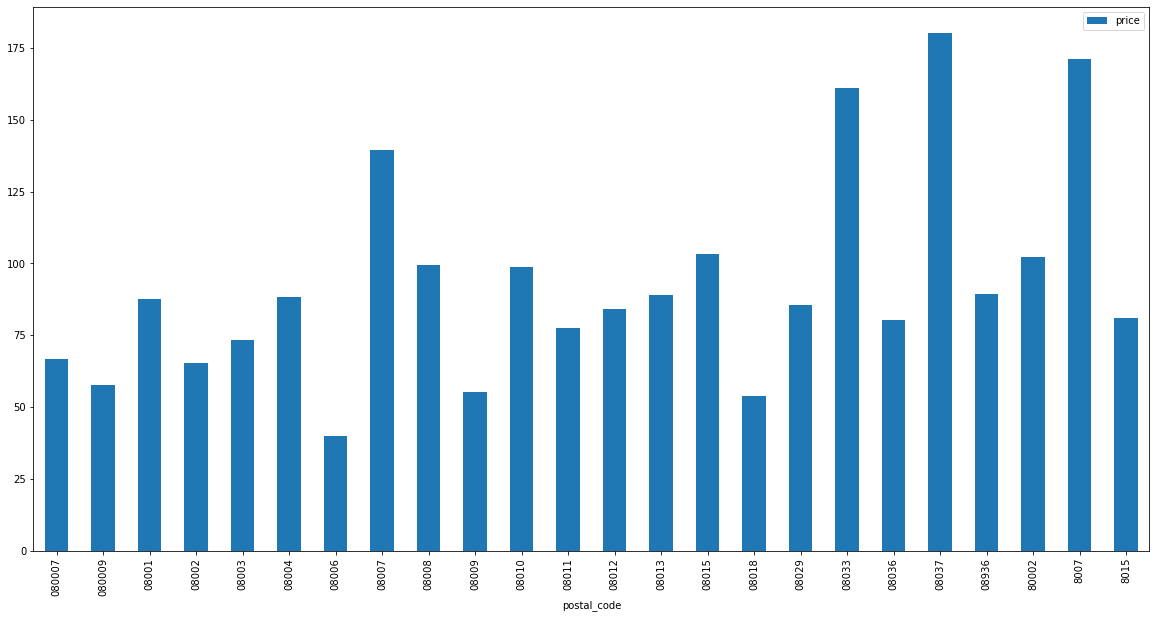

In [81]:
BCN_df_merge_pc.sort_values(by=['price'])
BCN_df_merge_pc.plot.bar(x='postal_code', y='price', rot=90,figsize=(20,10))

Let's count the number of rooms available for each advertisement and the advertisements available for each postal code

[Text(0, 0, '080007'),
 Text(0, 0, '080009'),
 Text(0, 0, '08001'),
 Text(0, 0, '08002'),
 Text(0, 0, '08003'),
 Text(0, 0, '08004'),
 Text(0, 0, '08006'),
 Text(0, 0, '08007'),
 Text(0, 0, '08008'),
 Text(0, 0, '08009'),
 Text(0, 0, '08010'),
 Text(0, 0, '08011'),
 Text(0, 0, '08012'),
 Text(0, 0, '08013'),
 Text(0, 0, '08015'),
 Text(0, 0, '08018'),
 Text(0, 0, '08029'),
 Text(0, 0, '08033'),
 Text(0, 0, '08036'),
 Text(0, 0, '08037'),
 Text(0, 0, '08936'),
 Text(0, 0, '80002'),
 Text(0, 0, '8007'),
 Text(0, 0, '8015')]

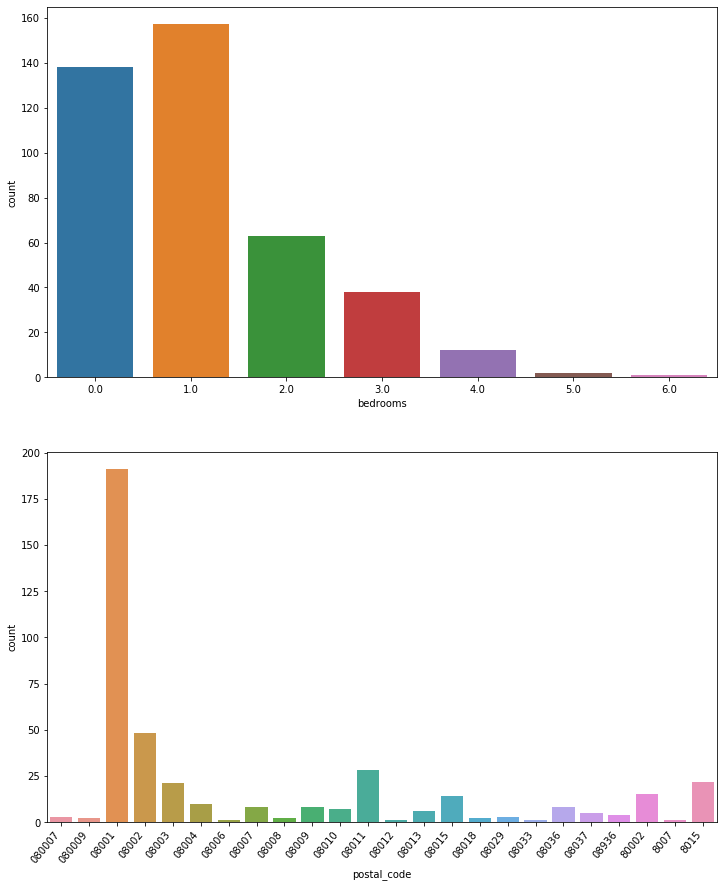

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax =plt.subplots(2,1, figsize=(12,15))
sns.countplot(BCN_df['bedrooms'], ax=ax[0])
sns.countplot(BCN_df['postal_code'], ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=50, ha="right")

Let's look how the capacity influences the price

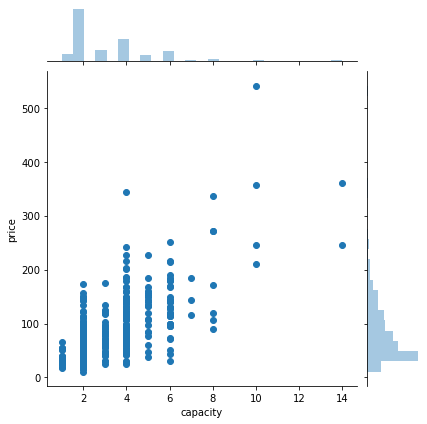

In [23]:
sns.jointplot(x='capacity', y='price', data=BCN_df[['capacity','price']])

Price distribution, as we can see the mean price is between 80 - 100 € per night

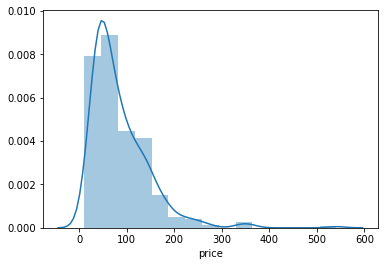

In [63]:
sns.distplot(BCN_df['price'],bins=15)

We expect the value of the rent increases as the capacity (number of persons that can enter in the property) do it. 
The interesting aspect in this boxplot is that 4 to 7 is equilibrated but as we increases the capacity the price shot up

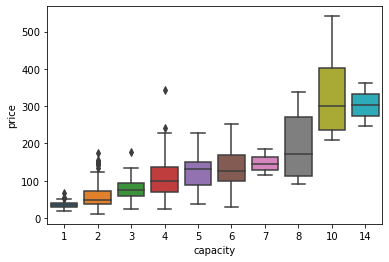

In [24]:
sns.boxplot(x='capacity', y='price', data=BCN_df)

But if we check the number of rooms, the price is more or less the same. So we have some advertisement with the price that does not align with the number of rooms

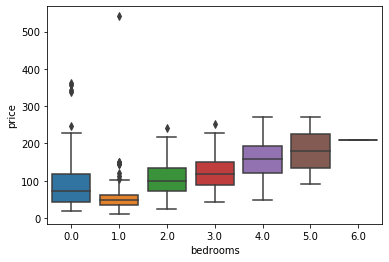

In [66]:
sns.boxplot(x='bedrooms', y='price', data=BCN_df)

In [25]:
print(BCN_df.info())
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 418
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           411 non-null    object 
 1   url          411 non-null    object 
 2   longitude    411 non-null    float64
 3   latitude     411 non-null    float64
 4   found        411 non-null    object 
 5   revised      411 non-null    object 
 6   host-id      411 non-null    object 
 7   room_type    411 non-null    object 
 8   bedrooms     411 non-null    float64
 9   capacity     411 non-null    int64  
 10  reviews      411 non-null    int64  
 11  min_nights   411 non-null    int64  
 12  price        411 non-null    float64
 13  Address      411 non-null    object 
 14  postal_code  411 non-null    object 
dtypes: float64(4), int64(3), object(8)
memory usage: 71.4+ KB
None


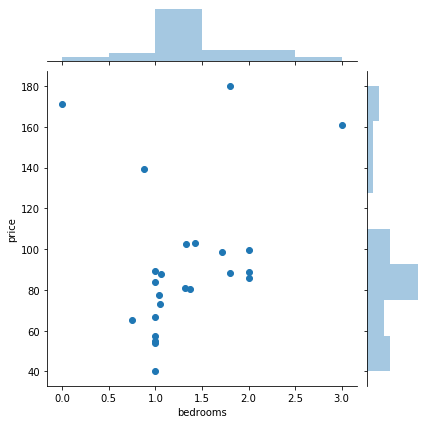

In [31]:
sns.jointplot(x='bedrooms', y='price', data=BCN_df_merge_pc[['bedrooms','price']])

Let's check if the number of bedrooms is aligned with the price

[Text(0, 0, '0.0'),
 Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0')]

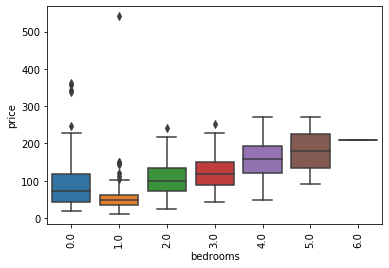

In [34]:
ax=sns.boxplot(x='bedrooms', y='price', data=BCN_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [35]:
BCN_address=BCN_df
#test.groupby('postal_code')['price'].mean()
BCN_address= BCN_address.groupby(('capacity'),as_index=False).mean()
BCN_address

,capacity,longitude,latitude,bedrooms,reviews,min_nights,price
0,1,2.165377,41.382949,0.640000,138.760000,2.080000,36.960000
1,2,2.167989,41.383003,0.651042,133.796875,2.234375,59.093750
2,3,2.167034,41.381492,1.225000,136.825000,3.025000,77.475000
3,4,2.166254,41.381927,1.382716,134.913580,2.518519,109.086420
4,5,2.165575,41.381858,2.000000,147.681818,2.136364,123.000000
5,6,2.163832,41.381978,2.057143,133.485714,2.142857,130.600000
6,7,2.162687,41.380277,3.666667,128.000000,2.333333,148.000000
7,8,2.168261,41.384951,3.000000,154.571429,7.000000,195.142857
8,10,2.171870,41.382801,2.750000,135.000000,2.750000,338.000000
9,14,2.170140,41.393894,0.000000,120.000000,3.500000,303.500000


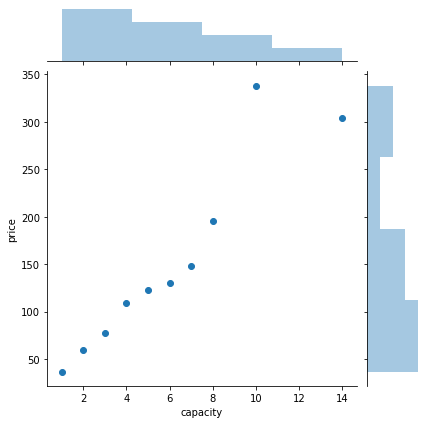

In [36]:
sns.jointplot(x='capacity', y='price', data=BCN_address[['capacity','price']])

As we saw earlier we have a few outliers , that the price of the room per night is to expensive, but normally for the rest is the standard price of the city

In [37]:
mean_per_district = BCN_df.groupby('Address').mean().reset_index()
mean_per_district

,Address,longitude,latitude,bedrooms,capacity,reviews,min_nights,price
0,Avinguda de Francesc Cambó,2.177989,41.386523,2.000000,3.000000,112.500000,3.000000,82.500000
1,Avinguda de Josep Tarradellas,2.142211,41.380844,1.000000,4.000000,126.000000,2.000000,24.000000
2,Avinguda de Miramar,2.168940,41.370233,2.000000,3.000000,122.000000,2.000000,117.000000
3,Avinguda de Mistral,2.156038,41.376027,1.000000,2.000000,152.000000,1.500000,32.500000
4,Avinguda de la Catedral,2.175761,41.384414,3.000000,7.000000,154.000000,2.000000,116.000000
...,...,...,...,...,...,...,...,...
194,Ronda de Sant Pau,2.165878,41.376936,1.000000,3.000000,183.000000,4.000000,73.000000
195,Ronda de la Universitat,2.167000,41.387000,3.000000,6.000000,118.000000,3.000000,119.000000
196,Via Augusta,2.154000,41.397336,1.000000,2.000000,140.000000,2.000000,40.000000
197,Via Laietana,2.175930,41.386107,0.833333,2.555556,129.944444,2.055556,62.833333


**Get Foursquare data**
Now it's time to check the Neighborhoods and the different venues that we have avialable. Let's use Forsquere data base to obtain the venues that are in range

Define Foursquare Credentials and Version

In [39]:
@hidden_cell
#Now we will introduce our credential for Foursquare
LIMIT = 100 # limit of number of venues returned by Foursquare API

CLIENT_ID ='3R0DVPRGIQW1120SZMT3HGRT10WSQCKG3BVDXVC5UFYDWYP0'
CLIENT_SECRET = '14E205NNFOBIQ4H242CW2FPOUISVWVRTS2XBPJZBMRYAKEGZ'

VERSION = '20180605' # Foursquare API version, same as used in the lab

Function to repeat the same process to all the districts in Barcelona

In [40]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [41]:
BCN_venues = getNearbyVenues(names=BCN_df['Address'],
                                   latitudes=BCN_df['latitude'],
                                   longitudes=BCN_df['longitude'],
                                   radius=2000, LIMIT=100)


In [42]:
BCN_venues

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Carrer de Còrsega,41.384836,2.144658,La Capricciosa,41.384953,2.144073,Pizza Place
1,Carrer de Còrsega,41.384836,2.144658,La cuina de l'Uribou,41.386799,2.140475,Japanese Restaurant
2,Carrer de Còrsega,41.384836,2.144658,Hotel U232,41.389613,2.148826,Hotel
3,Carrer de Còrsega,41.384836,2.144658,El Cafè de les Paraules,41.388553,2.143182,Café
4,Carrer de Còrsega,41.384836,2.144658,Triki-Trac,41.381382,2.141226,Spanish Restaurant
...,...,...,...,...,...,...,...
41095,Via Laietana,41.383290,2.179806,Restaurante Barceloneta,41.376213,2.187482,Seafood Restaurant
41096,Via Laietana,41.383290,2.179806,Circo de los Horrores,41.376724,2.187986,Circus
41097,Via Laietana,41.383290,2.179806,Cera 23,41.378947,2.166180,Spanish Restaurant
41098,Via Laietana,41.383290,2.179806,Yogabody Fitness 1,41.395192,2.177432,Yoga Studio


In [43]:
BCN_venues_backup = BCN_venues

BCN_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Avinguda de Francesc Cambó,200,200,200,200,200,200
Avinguda de Josep Tarradellas,100,100,100,100,100,100
Avinguda de Miramar,100,100,100,100,100,100
Avinguda de Mistral,200,200,200,200,200,200
Avinguda de la Catedral,100,100,100,100,100,100
...,...,...,...,...,...,...
Ronda de Sant Pau,100,100,100,100,100,100
Ronda de la Universitat,100,100,100,100,100,100
Via Augusta,100,100,100,100,100,100


Let's find out how many unique categories can be curated from all the returned venues

In [44]:
print('There are {} uniques categories.'.format(len(BCN_venues['Venue Category'].unique())))

There are 159 uniques categories.


# Analyze Each District

In [45]:
# one hot encoding
BCN_venues_one = pd.get_dummies(BCN_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
BCN_venues_one['District'] = BCN_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [BCN_venues_one.columns[-1]] + list(BCN_venues_one.columns[:-1])
BCN_venues_one = BCN_venues_one[fixed_columns]

BCN_venues_one.head()

,District,African Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Theater,Theme Park Ride / Attraction,Toy / Game Store,Transportation Service,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Carrer de Còrsega,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Carrer de Còrsega,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Carrer de Còrsega,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Carrer de Còrsega,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Carrer de Còrsega,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by district and by taking the mean of the frequency of occurrence of each category

In [46]:
BCN_grouped = BCN_venues_one.groupby('District').mean().reset_index()
BCN_grouped

,District,African Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Theater,Theme Park Ride / Attraction,Toy / Game Store,Transportation Service,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Avinguda de Francesc Cambó,0.00,0.0,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.03,0.020000,0.01
1,Avinguda de Josep Tarradellas,0.00,0.0,0.01,0.000000,0.000000,0.01,0.010000,0.0,0.0,...,0.00,0.01,0.00,0.0,0.00,0.0,0.0,0.04,0.020000,0.00
2,Avinguda de Miramar,0.00,0.0,0.00,0.010000,0.010000,0.02,0.000000,0.0,0.0,...,0.03,0.01,0.00,0.0,0.00,0.0,0.0,0.02,0.010000,0.00
3,Avinguda de Mistral,0.00,0.0,0.00,0.020000,0.000000,0.03,0.000000,0.0,0.0,...,0.03,0.01,0.00,0.0,0.00,0.0,0.0,0.03,0.010000,0.00
4,Avinguda de la Catedral,0.00,0.0,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.03,0.020000,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Ronda de Sant Pau,0.00,0.0,0.00,0.020000,0.000000,0.00,0.000000,0.0,0.0,...,0.03,0.01,0.00,0.0,0.00,0.0,0.0,0.02,0.010000,0.00
195,Ronda de la Universitat,0.00,0.0,0.00,0.020000,0.000000,0.00,0.000000,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.02,0.020000,0.01
196,Via Augusta,0.01,0.0,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.0,...,0.00,0.00,0.01,0.0,0.02,0.0,0.0,0.05,0.010000,0.00
197,Via Laietana,0.00,0.0,0.00,0.003333,0.000556,0.00,0.000556,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.03,0.021111,0.01


Let's write a function to sort the venues in descending order.

In [47]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create a new dataframe and display the top 10 venues for each district and plot the frequency of the different options avilable

In [48]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for idx in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(idx+1, indicators[idx]))
    except:
        columns.append('{}th Most Common Venue'.format(idx+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = BCN_grouped['District']

for idx in np.arange(BCN_grouped.shape[0]):
    district_venues_sorted.iloc[idx, 1:] = return_most_common_venues(BCN_grouped.iloc[idx, :], num_top_venues)

In [49]:
num_top_venues = 10

for district in BCN_grouped['District']:
    print("****"+district+"****")
    District_Statistics = BCN_grouped[BCN_grouped['District'] == district].T.reset_index()
    District_Statistics.columns = ['venue','freq']
    District_Statistics = District_Statistics.iloc[1:]
    District_Statistics['freq'] = District_Statistics['freq'].astype(float)
    District_Statistics = District_Statistics.round({'freq': 2})
    print(District_Statistics.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')



****Avinguda de Francesc Cambó****
                      venue  freq
0          Tapas Restaurant  0.10
1                     Hotel  0.09
2        Spanish Restaurant  0.04
3  Mediterranean Restaurant  0.04
4        Italian Restaurant  0.04
5              Dessert Shop  0.04
6                     Plaza  0.04
7                  Wine Bar  0.03
8                 Bookstore  0.03
9       Sporting Goods Shop  0.02


****Avinguda de Josep Tarradellas****
                 venue  freq
0     Tapas Restaurant  0.06
1                Hotel  0.05
2           Restaurant  0.05
3             Wine Bar  0.04
4          Coffee Shop  0.04
5                 Café  0.04
6             Beer Bar  0.03
7  Japanese Restaurant  0.03
8          Pizza Place  0.03
9   Spanish Restaurant  0.03


****Avinguda de Miramar****
                venue  freq
0    Tapas Restaurant  0.08
1  Italian Restaurant  0.06
2                Park  0.06
3        Cocktail Bar  0.05
4         Pizza Place  0.05
5  Spanish Restaurant  0.05
6     

In [50]:
district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Avinguda de Francesc Cambó,Tapas Restaurant,Hotel,Mediterranean Restaurant,Italian Restaurant,Spanish Restaurant,Plaza,Dessert Shop,Wine Bar,Bookstore,Bakery
1,Avinguda de Josep Tarradellas,Tapas Restaurant,Hotel,Restaurant,Wine Bar,Coffee Shop,Café,Spanish Restaurant,Japanese Restaurant,Pizza Place,Beer Bar
2,Avinguda de Miramar,Tapas Restaurant,Park,Italian Restaurant,Cocktail Bar,Pizza Place,Spanish Restaurant,Beer Bar,Hotel,Scenic Lookout,Garden
3,Avinguda de Mistral,Cocktail Bar,Tapas Restaurant,Coffee Shop,Hotel,Café,Pizza Place,Mediterranean Restaurant,Park,Spanish Restaurant,Theater
4,Avinguda de la Catedral,Tapas Restaurant,Hotel,Spanish Restaurant,Italian Restaurant,Cocktail Bar,Mediterranean Restaurant,Dessert Shop,Plaza,Pizza Place,Wine Bar
...,...,...,...,...,...,...,...,...,...,...,...
194,Ronda de Sant Pau,Tapas Restaurant,Park,Cocktail Bar,Pizza Place,Italian Restaurant,Café,Plaza,Spanish Restaurant,Hotel,Theater
195,Ronda de la Universitat,Hotel,Spanish Restaurant,Tapas Restaurant,Cocktail Bar,Mediterranean Restaurant,Bookstore,Pizza Place,Plaza,Market,Café
196,Via Augusta,Hotel,Wine Bar,Mediterranean Restaurant,Plaza,Tapas Restaurant,Spanish Restaurant,Pizza Place,Ice Cream Shop,Restaurant,Coffee Shop
197,Via Laietana,Tapas Restaurant,Hotel,Spanish Restaurant,Dessert Shop,Cocktail Bar,Italian Restaurant,Plaza,Mediterranean Restaurant,Bookstore,Wine Bar


Cluster Districts
Run k-means to cluster the districts into 4 clusters (in this case the best k is 4)

In [51]:
# set number of clusters
kclusters = 4

BCN_grouped_clustering = BCN_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(BCN_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int32)

In [52]:
mean_per_district

,Address,longitude,latitude,bedrooms,capacity,reviews,min_nights,price
0,Avinguda de Francesc Cambó,2.177989,41.386523,2.000000,3.000000,112.500000,3.000000,82.500000
1,Avinguda de Josep Tarradellas,2.142211,41.380844,1.000000,4.000000,126.000000,2.000000,24.000000
2,Avinguda de Miramar,2.168940,41.370233,2.000000,3.000000,122.000000,2.000000,117.000000
3,Avinguda de Mistral,2.156038,41.376027,1.000000,2.000000,152.000000,1.500000,32.500000
4,Avinguda de la Catedral,2.175761,41.384414,3.000000,7.000000,154.000000,2.000000,116.000000
...,...,...,...,...,...,...,...,...
194,Ronda de Sant Pau,2.165878,41.376936,1.000000,3.000000,183.000000,4.000000,73.000000
195,Ronda de la Universitat,2.167000,41.387000,3.000000,6.000000,118.000000,3.000000,119.000000
196,Via Augusta,2.154000,41.397336,1.000000,2.000000,140.000000,2.000000,40.000000
197,Via Laietana,2.175930,41.386107,0.833333,2.555556,129.944444,2.055556,62.833333



Let's create a new dataframe that includes the cluster as well as the price and the top 10 venues for each neighborhood.

In [53]:
# add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# add price/m2 for each district
BCN_merged = pd.merge(BCN_df, mean_per_district[['Address', 'price']])

# add latitude/longitude for each district
BCN_merged = BCN_merged.join(district_venues_sorted.set_index('District'), on='Address')

BCN_merged

,id,url,longitude,latitude,found,revised,host-id,room_type,bedrooms,capacity,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,airbnb599230b08a46554edf8846655855,https://www.airbnb.es/rooms/3279621,2.142211,41.380844,2017-09-05 12:15:14.420000,2018-06-01 09:13:19.896000,airbnb15920367,private_room,1.0,4,...,Tapas Restaurant,Hotel,Restaurant,Wine Bar,Coffee Shop,Café,Spanish Restaurant,Japanese Restaurant,Pizza Place,Beer Bar
1,airbnb599230b08a46554edf8846655979,https://www.airbnb.es/rooms/3920808,2.143814,41.374173,2017-08-15 15:08:54.505000,2017-09-09 03:28:54.036000,airbnb3242234,private_room,1.0,2,...,Tapas Restaurant,Wine Bar,Park,Restaurant,Hotel,Pizza Place,Plaza,Café,Mediterranean Restaurant,Japanese Restaurant
2,airbnb599230b08a46554edf8846655999,https://www.airbnb.es/rooms/3153363,2.144999,41.373232,2017-08-15 15:08:46.305000,2017-10-10 19:56:51.719000,airbnb10855185,entire_home,1.0,4,...,Tapas Restaurant,Café,Wine Bar,Hotel,Spanish Restaurant,Mediterranean Restaurant,Art Museum,Theater,Gym / Fitness Center,Restaurant
3,airbnb599230b08a46554edf8846656089,https://www.airbnb.es/rooms/15013734,2.141004,41.372114,2017-08-15 15:07:57.382000,2018-06-02 08:14:09.037000,airbnb94754060,entire_home,3.0,6,...,Tapas Restaurant,Mediterranean Restaurant,Wine Bar,Hotel,Restaurant,Italian Restaurant,Gym / Fitness Center,Theater,Plaza,Park
4,airbnb599230b08a46554edf8846657375,https://www.airbnb.es/rooms/7003476,2.141676,41.369605,2018-04-24 10:21:18.844000,2018-06-01 09:08:36.571000,airbnb27485706,private_room,0.0,2,...,Tapas Restaurant,Hotel,Mediterranean Restaurant,Restaurant,Italian Restaurant,Art Museum,Gym / Fitness Center,Theater,Café,Plaza
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,airbnb599230b08a46554edf88466528050,https://www.airbnb.es/rooms/3399953,2.179376,41.386782,2017-08-15 19:38:32.993000,2018-04-30 02:47:25.775000,airbnb16875725,private_room,1.0,2,...,Tapas Restaurant,Hotel,Italian Restaurant,Mediterranean Restaurant,Plaza,Coffee Shop,Bar,Bookstore,Spanish Restaurant,Dessert Shop
126,airbnb599230b08a46554edf88466528077,https://www.airbnb.es/rooms/1196515,2.179722,41.386557,2017-08-15 19:38:37.054000,2018-06-03 08:41:08.627000,airbnb139968,private_room,1.0,3,...,Tapas Restaurant,Hotel,Italian Restaurant,Plaza,Coffee Shop,Bar,Bookstore,Pizza Place,Dessert Shop,Spanish Restaurant
127,airbnb599230b08a46554edf88466528249,https://www.airbnb.es/rooms/1604145,2.179662,41.387479,2018-04-08 03:37:03.395000,2018-06-03 08:48:42.326000,airbnb8546697,private_room,1.0,2,...,Tapas Restaurant,Hotel,Plaza,Bookstore,Mediterranean Restaurant,Italian Restaurant,Coffee Shop,Dessert Shop,Sporting Goods Shop,Pizza Place
128,airbnb599230b08a46554edf88466528262,https://www.airbnb.es/rooms/847375,2.179607,41.388701,2018-04-08 03:37:09.119000,2018-04-30 02:43:35.020000,airbnb3823279,entire_home,2.0,5,...,Tapas Restaurant,Hotel,Plaza,Spanish Restaurant,Coffee Shop,Dessert Shop,Italian Restaurant,Bookstore,Mediterranean Restaurant,Market


In [54]:
BCN_merged['Cluster Labels'].value_counts()

0    52
1    35
2    32
3    11
Name: Cluster Labels, dtype: int64


Finally, let's visualize the resulting clusters

In [83]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BCN_merged['latitude'], BCN_merged['longitude'], BCN_merged['Address'], BCN_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Finally, let's visualize the resulting clusters

In [56]:

cluster1 = BCN_merged.loc[BCN_merged['Cluster Labels'] == 0, BCN_merged.columns[[0] + list(range(5, BCN_merged.shape[1]))]]
cluster1


,id,revised,host-id,room_type,bedrooms,capacity,reviews,min_nights,price,Address,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,airbnb599230b08a46554edf8846659597,2018-06-03 08:23:31.354000,airbnb4437210,entire_home,4.0,8,184,3,271.0,Carrer de la Mercè,...,Tapas Restaurant,Hotel,Cocktail Bar,Spanish Restaurant,Italian Restaurant,Plaza,Mediterranean Restaurant,Pizza Place,Wine Shop,Burger Joint
8,airbnb599230b08a46554edf8846659655,2018-05-12 17:41:00.910000,airbnb18973107,entire_home,2.0,3,103,3,123.0,Carrer Ample,...,Tapas Restaurant,Hotel,Cocktail Bar,Spanish Restaurant,Italian Restaurant,Plaza,Wine Shop,Dessert Shop,Mediterranean Restaurant,Burger Joint
9,airbnb599230b08a46554edf8846659727,2018-06-03 08:21:06.962000,airbnb5499752,private_room,0.0,2,157,2,96.0,Carrer dels Còdols,...,Tapas Restaurant,Hotel,Spanish Restaurant,Plaza,Pizza Place,Italian Restaurant,Cocktail Bar,Mediterranean Restaurant,Bar,Wine Bar
10,airbnb599230b08a46554edf8846659888,2018-06-03 08:14:23.022000,airbnb1818044,private_room,1.0,3,107,2,48.0,Passatge de la Banca,...,Tapas Restaurant,Hotel,Italian Restaurant,Plaza,Pizza Place,Cocktail Bar,Spanish Restaurant,Wine Shop,Dessert Shop,Burger Joint
11,airbnb599230b08a46554edf88466510117,2017-09-09 07:32:48.287000,airbnb34458047,private_room,1.0,2,102,4,60.0,Plaça Reial,...,Tapas Restaurant,Hotel,Cocktail Bar,Italian Restaurant,Plaza,Spanish Restaurant,Mediterranean Restaurant,Dessert Shop,Wine Shop,Bakery
70,airbnb599230b08a46554edf88466525504,2018-06-17 22:57:54.053000,airbnb6623148,private_room,0.0,2,157,2,29.0,Carrer Comtal,...,Hotel,Tapas Restaurant,Spanish Restaurant,Bookstore,Dessert Shop,Plaza,Mediterranean Restaurant,Italian Restaurant,Cocktail Bar,Wine Bar
71,airbnb599230b08a46554edf88466525507,2018-06-17 22:58:44.408000,airbnb30014023,private_room,0.0,2,121,2,110.0,Carrer de les Jonqueres,...,Hotel,Tapas Restaurant,Spanish Restaurant,Bookstore,Cocktail Bar,Dessert Shop,Plaza,Mediterranean Restaurant,Italian Restaurant,Wine Bar
72,airbnb599230b08a46554edf88466525520,2017-09-09 21:48:13.297000,airbnb23812342,private_room,1.0,2,123,1,25.0,Carrer d'Amargós,...,Hotel,Tapas Restaurant,Spanish Restaurant,Cocktail Bar,Dessert Shop,Plaza,Bookstore,Mediterranean Restaurant,Italian Restaurant,Wine Bar
73,airbnb599230b08a46554edf88466525527,2018-06-17 22:54:29.683000,airbnb19950109,entire_home,2.0,4,122,4,110.0,Passatge del Patriarca,...,Hotel,Tapas Restaurant,Spanish Restaurant,Cocktail Bar,Dessert Shop,Plaza,Bookstore,Mediterranean Restaurant,Italian Restaurant,Wine Bar
74,airbnb599230b08a46554edf88466525560,2018-05-12 17:59:54.489000,airbnb6369081,entire_home,1.0,2,151,3,147.0,Avinguda del Portal de l'Àngel,...,Hotel,Tapas Restaurant,Cocktail Bar,Spanish Restaurant,Dessert Shop,Plaza,Bookstore,Mediterranean Restaurant,Italian Restaurant,Wine Bar


In [57]:

cluster2 = BCN_merged.loc[BCN_merged['Cluster Labels'] == 1, BCN_merged.columns[[0] + list(range(5, BCN_merged.shape[1]))]]
cluster2


,id,revised,host-id,room_type,bedrooms,capacity,reviews,min_nights,price,Address,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,airbnb599230b08a46554edf8846655855,2018-06-01 09:13:19.896000,airbnb15920367,private_room,1.0,4,126,2,24.0,Avinguda de Josep Tarradellas,...,Tapas Restaurant,Hotel,Restaurant,Wine Bar,Coffee Shop,Café,Spanish Restaurant,Japanese Restaurant,Pizza Place,Beer Bar
1,airbnb599230b08a46554edf8846655979,2017-09-09 03:28:54.036000,airbnb3242234,private_room,1.0,2,104,5,40.0,Carrer d'Hostafrancs de Sió,...,Tapas Restaurant,Wine Bar,Park,Restaurant,Hotel,Pizza Place,Plaza,Café,Mediterranean Restaurant,Japanese Restaurant
2,airbnb599230b08a46554edf8846655999,2017-10-10 19:56:51.719000,airbnb10855185,entire_home,1.0,4,142,2,69.0,Carretera de la Bordeta,...,Tapas Restaurant,Café,Wine Bar,Hotel,Spanish Restaurant,Mediterranean Restaurant,Art Museum,Theater,Gym / Fitness Center,Restaurant
3,airbnb599230b08a46554edf8846656089,2018-06-02 08:14:09.037000,airbnb94754060,entire_home,3.0,6,122,2,99.0,Carrer de Gavà,...,Tapas Restaurant,Mediterranean Restaurant,Wine Bar,Hotel,Restaurant,Italian Restaurant,Gym / Fitness Center,Theater,Plaza,Park
4,airbnb599230b08a46554edf8846657375,2018-06-01 09:08:36.571000,airbnb27485706,private_room,0.0,2,109,1,38.0,Gran Via de les Corts Catalanes (lateral munta...,...,Tapas Restaurant,Hotel,Mediterranean Restaurant,Restaurant,Italian Restaurant,Art Museum,Gym / Fitness Center,Theater,Café,Plaza
5,airbnb599230b08a46554edf8846657439,2018-06-01 09:09:23.301000,airbnb2488904,private_room,1.0,1,194,2,30.0,Carrer de la Guatlla,...,Tapas Restaurant,Hotel,Restaurant,Café,Art Museum,Burger Joint,Park,Mediterranean Restaurant,Coffee Shop,Italian Restaurant
6,airbnb599230b08a46554edf8846659520,2018-05-12 15:57:29.308000,airbnb2333736,entire_home,2.0,3,122,2,117.0,Avinguda de Miramar,...,Tapas Restaurant,Park,Italian Restaurant,Cocktail Bar,Pizza Place,Spanish Restaurant,Beer Bar,Hotel,Scenic Lookout,Garden
18,airbnb599230b08a46554edf88466510553,2018-06-03 06:26:37.266000,airbnb1377939,private_room,2.0,4,105,3,179.0,Carrer de les Tàpies,...,Tapas Restaurant,Italian Restaurant,Cocktail Bar,Pizza Place,Hotel,Spanish Restaurant,Park,Coffee Shop,Garden,Plaza
19,airbnb599230b08a46554edf88466510598,2017-09-09 07:58:56.030000,airbnb7199088,private_room,1.0,2,183,1,25.0,Carrer de Sant Bertran,...,Tapas Restaurant,Italian Restaurant,Pizza Place,Hotel,Cocktail Bar,Spanish Restaurant,Coffee Shop,Café,Plaza,Beer Bar
20,airbnb599230b08a46554edf88466510802,2018-06-03 06:13:08.326000,airbnb35069722,entire_home,2.0,4,137,2,118.0,Carrer de Cabanes,...,Tapas Restaurant,Italian Restaurant,Pizza Place,Park,Cocktail Bar,Hotel,Spanish Restaurant,Beer Bar,Café,Garden


In [58]:

cluster3 = BCN_merged.loc[BCN_merged['Cluster Labels'] == 2, BCN_merged.columns[[0] + list(range(5, BCN_merged.shape[1]))]]
cluster3

,id,revised,host-id,room_type,bedrooms,capacity,reviews,min_nights,price,Address,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,airbnb599230b08a46554edf88466510278,2018-06-03 07:31:00.789000,airbnb43505134,private_room,1.0,2,119,1,36.0,Carrer de Santa Margarida,...,Hotel,Tapas Restaurant,Spanish Restaurant,Café,Cocktail Bar,Italian Restaurant,Pizza Place,Plaza,Wine Shop,Wine Bar
13,airbnb599230b08a46554edf88466510285,2018-06-03 07:39:15.483000,airbnb51651184,entire_home,1.0,10,109,2,541.0,Carrer de l'Arc de Sant Agustí,...,Hotel,Tapas Restaurant,Spanish Restaurant,Cocktail Bar,Italian Restaurant,Café,Pizza Place,Coffee Shop,Dessert Shop,Plaza
14,airbnb599230b08a46554edf88466510351,2018-06-03 07:39:06.213000,airbnb11149400,private_room,2.0,4,151,4,114.0,Carrer de la Junta del Comerç,...,Hotel,Tapas Restaurant,Spanish Restaurant,Pizza Place,Cocktail Bar,Italian Restaurant,Café,Coffee Shop,Plaza,Wine Bar
15,airbnb599230b08a46554edf88466510436,2018-06-03 07:30:15.752000,airbnb50445571,private_room,0.0,2,109,2,26.0,Plaça de Salvador Seguí,...,Tapas Restaurant,Hotel,Italian Restaurant,Pizza Place,Spanish Restaurant,Cocktail Bar,Café,Coffee Shop,Plaza,Bookstore
16,airbnb599230b08a46554edf88466510457,2018-05-13 02:29:58.324000,airbnb2460801,entire_home,0.0,10,143,2,356.0,Carrer d'en Robador,...,Tapas Restaurant,Hotel,Spanish Restaurant,Pizza Place,Italian Restaurant,Café,Cocktail Bar,Coffee Shop,Plaza,Wine Bar
17,airbnb599230b08a46554edf88466510460,2018-06-03 07:30:28.697000,airbnb2346691,entire_home,3.0,4,133,2,47.0,Carrer Sant Pau,...,Tapas Restaurant,Hotel,Italian Restaurant,Pizza Place,Spanish Restaurant,Café,Cocktail Bar,Park,Coffee Shop,Plaza
29,airbnb599230b08a46554edf88466511504,2018-06-03 07:16:09.636000,airbnb47499138,private_room,2.0,1,122,2,53.0,Carrer de Vistalegre,...,Tapas Restaurant,Hotel,Cocktail Bar,Italian Restaurant,Pizza Place,Spanish Restaurant,Beer Bar,Café,Park,Bookstore
32,airbnb599230b08a46554edf88466511628,2017-09-09 08:59:51.735000,airbnb2891713,private_room,1.0,2,113,4,50.0,Carrer de Sant Bartomeu,...,Tapas Restaurant,Hotel,Cocktail Bar,Italian Restaurant,Pizza Place,Spanish Restaurant,Coffee Shop,Park,Plaza,Café
33,airbnb599230b08a46554edf88466511630,2017-09-09 08:59:55.616000,airbnb748500,private_room,1.0,2,190,1,36.0,Carrer de Sant Martí,...,Tapas Restaurant,Hotel,Cocktail Bar,Italian Restaurant,Pizza Place,Spanish Restaurant,Coffee Shop,Park,Plaza,Café
34,airbnb599230b08a46554edf88466511691,2018-05-13 02:25:17.267000,airbnb41726982,entire_home,1.0,3,160,2,85.0,Rambla del Raval,...,Tapas Restaurant,Hotel,Italian Restaurant,Pizza Place,Cocktail Bar,Spanish Restaurant,Bookstore,Café,Plaza,Beer Bar


In [59]:

cluster4 = BCN_merged.loc[BCN_merged['Cluster Labels'] == 3, BCN_merged.columns[[0] + list(range(5, BCN_merged.shape[1]))]]
cluster4

,id,revised,host-id,room_type,bedrooms,capacity,reviews,min_nights,price,Address,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,airbnb599230b08a46554edf88466517142,2018-06-02 09:59:49.940000,airbnb729980,entire_home,0.0,4,193,1,96.0,Rambla de Catalunya,...,Hotel,Mediterranean Restaurant,Bookstore,Tapas Restaurant,Wine Bar,Dessert Shop,Coffee Shop,Cocktail Bar,Market,Ice Cream Shop
60,airbnb599230b08a46554edf88466517276,2017-10-14 10:16:43.724000,airbnb33644849,entire_home,2.0,6,123,2,100.0,Carrer de Provença,...,Hotel,Tapas Restaurant,Mediterranean Restaurant,Wine Bar,Plaza,Coffee Shop,Restaurant,Bistro,Bookstore,Hostel
61,airbnb599230b08a46554edf88466517294,2017-09-09 14:40:29.677000,airbnb33644849,entire_home,2.0,6,103,2,99.0,Passatge de la Concepció,...,Hotel,Tapas Restaurant,Mediterranean Restaurant,Plaza,Wine Bar,Coffee Shop,Indie Movie Theater,Bookstore,Bakery,Bistro
62,airbnb599230b08a46554edf88466517549,2018-06-02 11:42:22.910000,airbnb14306662,private_room,1.0,2,192,1,84.0,Passatge de Romùl Bosch,...,Plaza,Spanish Restaurant,Mediterranean Restaurant,Bakery,Coffee Shop,Hotel,Historic Site,Tapas Restaurant,Bookstore,Sandwich Place
63,airbnb599230b08a46554edf88466517571,2018-05-12 21:17:02.305000,airbnb7555973,private_room,0.0,2,141,2,43.0,Carrer de la Llibertat,...,Plaza,Mediterranean Restaurant,Coffee Shop,Bakery,Spanish Restaurant,Hotel,Wine Bar,Japanese Restaurant,Ice Cream Shop,Historic Site
64,airbnb599230b08a46554edf88466517793,2018-05-12 20:34:01.525000,airbnb38101869,entire_home,1.0,2,116,3,122.0,Carrer de la Riera de Sant Miquel,...,Hotel,Tapas Restaurant,Mediterranean Restaurant,Restaurant,Plaza,Ice Cream Shop,Coffee Shop,Spanish Restaurant,Bakery,Indie Movie Theater
65,airbnb599230b08a46554edf88466518135,2017-09-09 15:21:36.416000,airbnb967903,private_room,1.0,2,140,2,40.0,Via Augusta,...,Hotel,Wine Bar,Mediterranean Restaurant,Plaza,Tapas Restaurant,Spanish Restaurant,Pizza Place,Ice Cream Shop,Restaurant,Coffee Shop
66,airbnb599230b08a46554edf88466523348,2018-05-12 22:52:45.360000,airbnb37927556,entire_home,3.0,4,112,2,147.0,Carrer de Sardenya,...,Hotel,Coffee Shop,Bakery,Spanish Restaurant,Café,Market,Plaza,Historic Site,Italian Restaurant,Indie Movie Theater
67,airbnb599230b08a46554edf88466524094,2018-04-30 06:22:32.190000,airbnb13059215,entire_home,0.0,4,101,5,109.0,Carrer de Sicília,...,Hotel,Spanish Restaurant,Coffee Shop,Bakery,Boutique,Historic Site,Plaza,Italian Restaurant,Restaurant,Burger Joint
68,airbnb599230b08a46554edf88466524970,2017-10-14 10:17:56.760000,airbnb29049738,private_room,1.0,2,109,1,45.0,Passeig de Gràcia (laterals),...,Hotel,Mediterranean Restaurant,Bookstore,Coffee Shop,Wine Bar,Plaza,Tapas Restaurant,Market,Ice Cream Shop,Hostel


**Results**

As we can see the cluster 0 and 2 offers a huge range of opportunities to enjoy for our vacations, also has one of the increased prices, which corresponds with the center of the city
The cluster 1 and 3 are more cheaper with less opportunities nearby.

I am positively impressed with the overall organization, content and lab works presented during the Coursera IBM Certification Course, maybe the last two were the more complex (machine learning and capstone project).
The Capstone project presented me a great opportunity to practice and apply the Data Science tools and methodologies learned.


**Discussion and Conclusion**

This project has shown me a practical application to resolve a real situation that has impacting personal and financial impact using Data Science tools.
The results will be improved if we use more data, but bear in mind that the free account of foursquare is very limited. 
Based on the available data, my advice to would be to focus on the surroundings of Barcelona center to avoid expensive rents, checking the public transport available that would be 
